In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/home/stomps/repos/helpmetric"))
import mytool as mt
import numpy as np

In [2]:
def read_output(filename):
    feed = np.array([])
    product = np.array([])
    tail = np.array([])

    assay = 0
    
    file = open(filename,"r")
    for line in file:        
        if line[0] == 'F':
            assay = 1
        elif line[0] == 'P':
            assay = 2
        elif line[0] == 'T':
            assay = 3
        if line[0].isdigit():
            if assay == 1:
                feed = np.append(feed,float(line))
            elif assay == 2:
                product = np.append(product,float(line))
            elif assay == 3:
                tail = np.append(tail,float(line))
                
    return sorted(feed), sorted(product), sorted(tail)

In [3]:
# Case 1 No Recycling
feed_NR1, product_NR1, tail_NR1 = read_output("case_1/NR_raw_S3.log")

print("Case 1 NR:\n")
print("Feed Assays: ",feed_NR1)
print("Product Assays: ",product_NR1)
print("Tail Assays: ",tail_NR1)

#Case 1 no recycling
#T = 15.9527
T = tail_NR1[-1]
#P = 78.5409
P = product_NR1[-1]
#F = 22.7931
F = feed_NR1[-1]

v = (T-F)/(T-P)
print("virtual cut", v)
cut = [v, v, v, v]

flow = mt.calc_feed_flows_no_back(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

Case 1 NR:

Feed Assays:  [0.71, 3.81085, 19.6821, 72.8245, 72.8245]
Product Assays:  [3.81085, 19.6821, 72.8245, 97.6901, 97.6901]
Tail Assays:  [0.272224, 1.57013, 12.1795, 69.314, 69.314]
virtual cut 0.12371326574124021
26.294761369767887
3.2530108009405923
0.4024405896758881
0.049787239615634554


 Case 1 NR:
 * Feed Assay: 22.7931
 * Product Assay: 78.5409
 * Tails Assay: 15.9527
 
 
 * Feed Assay: 4.12842
 * Product Assay: 22.7931
 * Tails Assay: 1.8382


 * Feed Assay: 0.71
 * Product Assay: 4.12842
 * Tails Assay: 0.290548


In [4]:
# Case 1 Recycling
feed_R1, product_R1, tail_R1 = read_output("case_1/R_raw_S2.log")
del feed_R1[1]
del product_R1[1]
del tail_R1[1]

print("Case 1 R:\n")
print("Feed Assays: ",feed_R1)
print("Product Assays: ",product_R1)
print("Tail Assays: ",tail_R1)

#Case 1 recycling
#T = 15.9527
#P = 78.5409
#F = 22.7931
T = tail_R1[-1]
P = product_R1[-1]
F = feed_R1[-1]

v = (T-F)/(T-P)
print("virtual cut", v)
cut = [v, v, v]

flow = mt.calc_feed_flows_no_back(3, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

Case 1 R:

Feed Assays:  [1.24355, 10.4727, 48.3233, 48.3257]
Product Assays:  [6.63397, 48.3301, 93.428, 93.4287]
Tail Assays:  [0.482518, 5.12801, 41.9554, 41.958]
virtual cut 0.12371504564732942
26.338420688494274
3.2584589177556347
0.40312039375008596


 Case 1 R:
 * Feed Assay: 1.33793
 * Product Assay: 7.71256
 * Tails Assay: 0.555738


 * Feed Assay: 11.935
 * Product Assay: 55.7215
 * Tails Assay: 6.56228


 * Feed Assay: 55.7214
 * Product Assay: 95.0027
 * Tails Assay: 50.9015



In [5]:
#Case 2 no recycling
feed_NR2, product_NR2, tail_NR2 = read_output("case_2/NR_raw_S3.log")

print("Case 2 NR:\n")
print("Feed Assays: ",feed_NR2)
print("Product Assays: ",product_NR2)
print("Tail Assays: ",tail_NR2)

F = feed_NR2[0]
P = product_NR2[0]
T = tail_NR2[0]

v_0 = (T-F)/(T-P)
print("virtual cut", v_0)


F = feed_NR2[1]
P = product_NR2[1]
T = tail_NR2[1]

v_1 = (T-F)/(T-P)
print("virtual cut", v_1)

F = feed_NR2[2]
P = product_NR2[2]
T = tail_NR2[2]

v_2 = (T-F)/(T-P)
print("virtual cut", v_2)

F = feed_NR2[3]
P = product_NR2[3]
T = tail_NR2[3]

v_3 = (T-F)/(T-P)
print("virtual cut", v_3)

cut = [v_0, v_1, v_2, v_3]

flow = mt.calc_feed_flows_no_back(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

Case 2 NR:

Feed Assays:  [0.71, 3.81085, 17.9993, 54.8764, 54.8764]
Product Assays:  [3.81085, 17.9993, 54.8764, 87.0766, 87.0766]
Tail Assays:  [0.272224, 1.48982, 7.73126, 31.705, 31.705]
virtual cut 0.12371355435697358
virtual cut 0.14058771081826923
virtual cut 0.21779636246705394
virtual cut 0.41847084064755213
26.203294456409942
3.241702693064856
0.45574356077140654
0.09925928975379508


 Case 2 NR:

 * Feed Assay: 0.71
 * Product Assay: 4.12842
 * Tails Assay: 0.290548


 * Feed Assay: 4.12842
 * Product Assay: 20.5921
 * Tails Assay: 1.72452


 * Feed Assay: 20.5921
 * Product Assay: 60.9623
 * Tails Assay: 9.55737


 * Feed Assay: 60.9623
 * Product Assay: 90.3884
 * Tails Assay: 38.889


 * Feed Assay: 90.3884
 * Product Assay: 98.2648
 * Tails Assay: 79.3055



In [6]:
#Case 2 recycling
feed_R2, product_R2, tail_R2 = read_output("case_2/R_raw_S3.log")

print("Case 2 R:\n")
print("Feed Assays: ",feed_R2)
print("Product Assays: ",product_R2)
print("Tail Assays: ",tail_R2)

F = feed_R2[1]
P = product_R2[1]
T = tail_R2[1]

v_0 = (T-F)/(T-P)
print("virtual cut", v_0)


F = feed_R2[2]
P = product_R2[2]
T = tail_R2[2]

v_1 = (T-F)/(T-P)
print("virtual cut", v_1)

F = feed_R2[3]
P = product_R2[3]
T = tail_R2[3]

v_2 = (T-F)/(T-P)
print("virtual cut", v_2)

F = feed_R2[4]
P = product_R2[4]
T = tail_R2[4]

v_3 = (T-F)/(T-P)
print("virtual cut", v_3)

cut = [v_0, v_1, v_2, v_3]

flow = mt.calc_feed_flows_no_back(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

Case 2 R:

Feed Assays:  [0.904594, 5.86997, 28.4418, 68.7695, 68.7699]
Product Assays:  [4.8141, 25.6783, 68.7706, 92.4242, 92.4244]
Tail Assays:  [0.347253, 2.32513, 13.1736, 45.669, 45.6695]
virtual cut 0.15179266883253967
virtual cut 0.274622731442344
virtual cut 0.494073386489631
virtual cut 0.4940744178685016
24.710186786603657
3.7508251996891264
1.0300618615014032
0.5089261522058115


 Case 2 R:

 
 * Feed Assay: 0.944612
 * Product Assay: 5.43084
 * Tails Assay: 0.387098
 
 
 * Feed Assay: 6.8406
 * Product Assay: 30.661
 * Tails Assay: 2.90531
 
 
 * Feed Assay: 34.2565
 * Product Assay: 75.8328
 * Tails Assay: 17.5145
 
 
 * Feed Assay: 75.8328
 * Product Assay: 94.9739
 * Tails Assay: 56.1148

In [7]:
#Case 3 no recycling
feed_NR3, product_NR3, tail_NR3 = read_output("case_3/NR_raw_S3.log")

print("Case 3 NR:\n")
print("Feed Assays: ",feed_NR3)
print("Product Assays: ",product_NR3)
print("Tail Assays: ",tail_NR3)

F = feed_NR3[-1]
P = product_NR3[-1]
T = tail_NR3[-1]

#F = 4.12842
#P = 22.9913
#T = 1.81388 


v = (T-F)/(T-P)
print("virtual cut", v)
cut = [v, v, v, v]

flow = mt.calc_feed_flows_no_back(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

Case 3 NR:

Feed Assays:  [0.71, 3.81085, 17.9993, 54.8764, 54.8764]
Product Assays:  [3.81085, 17.9993, 54.8764, 87.0766, 87.0766]
Tail Assays:  [0.272224, 1.80773, 12.793, 50.3304, 50.3304]
virtual cut 0.12371347241347402
26.294755209316484
3.2530154732068275
0.40244184000517697
0.04978747747150819


 CASE 3 NR
 
 
 * Feed Assay: 0.71
 * Product Assay: 4.12842
 * Tails Assay: 0.290548
 
 
 * Feed Assay: 4.12842
 * Product Assay: 22.9913
 * Tails Assay: 1.81388
 
 
 * Feed Assay: 22.9913
 * Product Assay: 82.3417
 * Tails Assay: 15.7088
 
 
 * Feed Assay: 82.3417
 * Product Assay: 99.1171
 * Tails Assay: 80.2833



In [8]:
#Case 3 recycling
feed_R3, product_R3, tail_R3 = read_output("case_3/R_raw_S3.log")

print("Case 3 R:\n")
print("Feed Assays: ",feed_R3)
print("Product Assays: ",product_R3)
print("Tail Assays: ",tail_R3)

#F = 16.0337
#P = 69.8334
#T = 9.43224
F = feed_R3[-2]
P = product_R3[-2]
T = tail_R3[-2]

v = (T-F)/(T-P)
print("virtual cut", v)

#F = 72.6095
#P = 98.4403
#T = 69.4399
F = feed_R3[-1]
P = product_R3[-1]
T = tail_R3[-1]

v = (T-F)/(T-P)
print("virtual cut", v)

cut = [v, v, v, v]

flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

Case 3 R:

Feed Assays:  [1.63979, 12.7815, 48.8964, 84.1291, 84.1294]
Product Assays:  [8.45559, 44.8101, 84.1298, 96.7072, 96.7072]
Tail Assays:  [0.677541, 8.25973, 43.9221, 82.3534, 82.3536]
virtual cut 0.12370940099485848
virtual cut 0.12371809162858124
25.799671388176346
3.6337260693104128
0.5042212515169819
0.06238129099625589


Case 3 R:
 * Feed Assay: 1.65711
 * Product Assay: 9.52991
 * Tails Assay: 0.691081


 * Feed Assay: 16.0337
 * Product Assay: 69.8334
 * Tails Assay: 9.43224


 * Feed Assay: 72.6095
 * Product Assay: 98.4403
 * Tails Assay: 69.4399


In [9]:
#f_ANR = [0.71, 4.13, 22.8, 78.5]
#p_ANR = [4.13, 22.8, 78.5, 98.2]
#t_ANR = [0.29, 1.8, 4.13, 76.1]
f_ANR = feed_NR1[:-1]
p_ANR = product_NR1[:-1]
t_ANR = tail_NR1[:-1]

#f_AR = [1.3, 11.9, 55.7]
#p_AR = [7.7, 55.7, 95.0]
#t_AR = [0.5, 6.6, 50.9]
f_AR = feed_R1[:-1]
p_AR = product_R1[:-1]
t_AR = tail_R1[:-1]
print(t_AR)

#f_BNR = [0.71, 4.13, 20.6, 61.0]
#p_BNR = [4.13, 20.6, 61.0, 90.4]
#t_BNR = [0.29, 1.72, 9.56, 79.3]
f_BNR = feed_NR2[1:]
p_BNR = product_NR2[1:]
t_BNR = tail_NR2[1:]

#f_BR = [0.94, 6.84, 34.3, 75.8]
#p_BR = [5.43, 30.7, 75.8, 95.0]
#t_BR = [0.39, 2.91, 17.5, 56.1]
f_BR = feed_R2[:-1]
p_BR = product_R2[:-1]
t_BR = tail_R2[:-1]

#f_CNR = [0.71, 4.13, 22.9, 82.3]
#p_CNR = [4.13, 22.9, 82.0, 99.1]
#t_CNR = [0.29, 1.81, 15.7, 80.3]
f_CNR = feed_NR3[:-1]
p_CNR = product_NR3[:-1]
t_CNR = tail_NR3[:-1]

#f_CR = [1.33, 12.2, 58.5]
#p_CR = [4.82, 58.5, 97.0]
#t_CR = [0.55, 6.52, 53.8]
f_CR = feed_R3[:-1]
p_CR = product_R3[:-1]
t_CR = tail_R3[:-1]



[0.482518, 5.12801, 41.9554]


/home/stomps/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


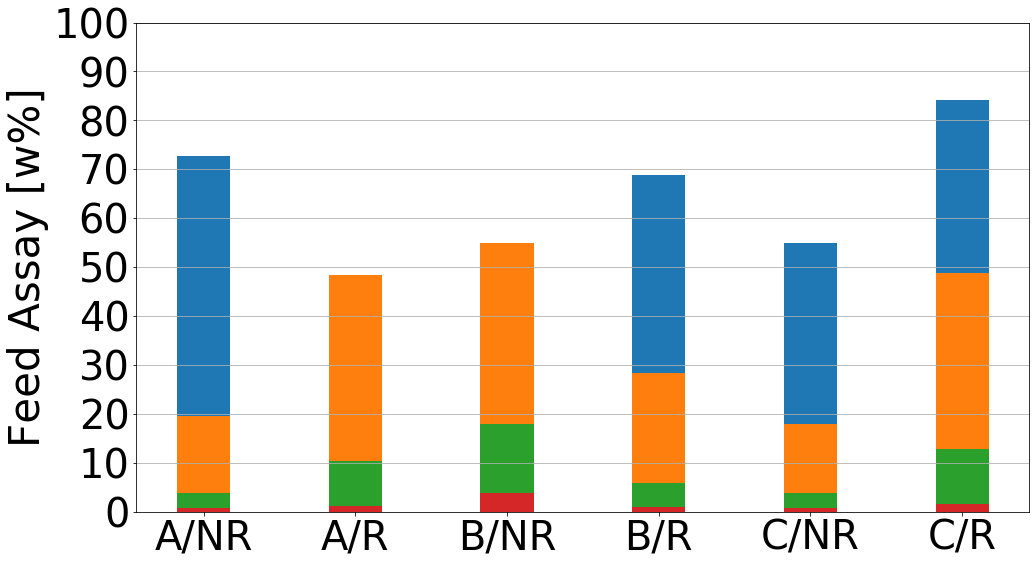

In [10]:
import matplotlib.pyplot as plt
import numpy as np
SMALL_SIZE = 40
MEDIUM_SIZE = SMALL_SIZE+2
BIGGER_SIZE = MEDIUM_SIZE +2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(16,9))

f_lvls = []

for i in range(4):
    f_lvl = []
    if i < len(f_ANR):
        f_lvl.append(f_ANR[i])
    else:
        f_lvl.append(0)
        
    if i < len(f_AR):
        f_lvl.append(f_AR[i])
    else:
        f_lvl.append(0)

    if i < len(f_BNR):
        f_lvl.append(f_BNR[i])
    else:
        f_lvl.append(0)

    if i < len(f_BR):
        f_lvl.append(f_BR[i])
    else:
        f_lvl.append(0)

    if i < len(f_CNR):
        f_lvl.append(f_CNR[i])
    else:
        f_lvl.append(0)

    if i < len(f_CR):
        f_lvl.append(f_CR[i])
    else:
        f_lvl.append(0)
    print
    f_lvls.append(tuple(f_lvl))

N = np.arange(6)
width = 0.35       # the width of the bars: can also be len(x) sequence
empty = (0,0,0,0,0,0)


f_p4 = plt.bar(N, f_lvls[3], width)
f_p3 = plt.bar(N, f_lvls[2], width )
f_p2 = plt.bar(N, f_lvls[1], width )
f_p1 = plt.bar(N, f_lvls[0], width)



plt.ylabel('Feed Assay [w%]')
#plt.title('Scores by group and gender')
plt.xticks(N, ('A/NR', 'A/R', 'B/NR', 'B/R', 'C/NR', 'C/R'))
plt.yticks(np.arange(0, 110, 10))
#plt.legend((p1[0], p2[0], p3[0], p4[0]), ('lvl 1', 'lvl 2', 'lvl 3', 'lvl 4'))

plt.axes().yaxis.grid()
plt.savefig("feed_assays.png", dpi=150)
plt.show()

/home/stomps/.local/lib/python3.6/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


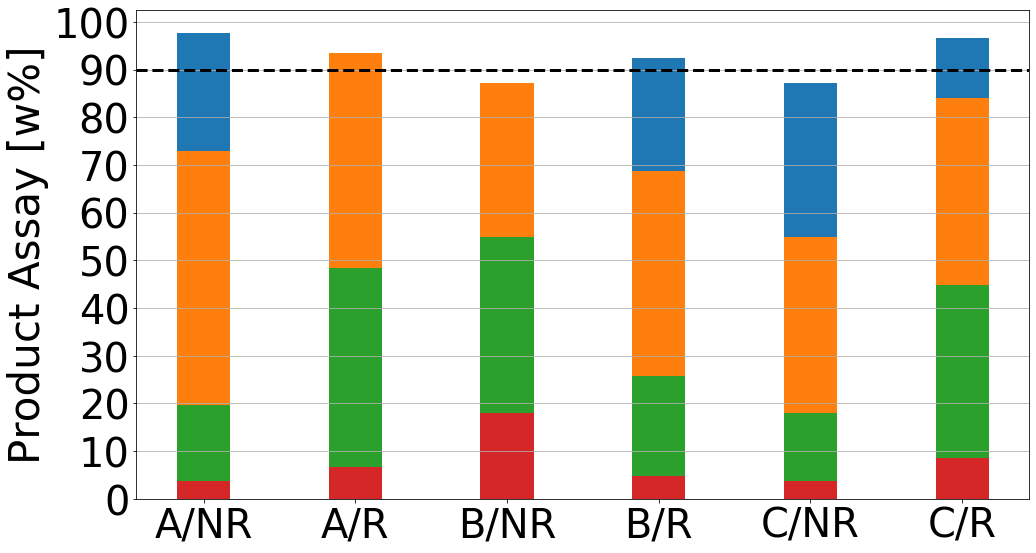

In [11]:
import matplotlib.pyplot as plt
import numpy as np
SMALL_SIZE = 40
MEDIUM_SIZE = SMALL_SIZE+2
BIGGER_SIZE = MEDIUM_SIZE +2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(16,9))


p_lvls = []

for i in range(4):
    p_lvl = []
    if i < len(p_ANR):
        p_lvl.append(p_ANR[i])
    else:
        p_lvl.append(0)
        
    if i < len(p_AR):
        p_lvl.append(p_AR[i])
    else:
        p_lvl.append(0)

    if i < len(p_BNR):
        p_lvl.append(p_BNR[i])
    else:
        p_lvl.append(0)

    if i < len(p_BR):
        p_lvl.append(p_BR[i])
    else:
        p_lvl.append(0)

    if i < len(p_CNR):
        p_lvl.append(p_CNR[i])
    else:
        p_lvl.append(0)

    if i < len(p_CR):
        p_lvl.append(p_CR[i])
    else:
        p_lvl.append(0)
    print
    p_lvls.append(tuple(p_lvl))

N = np.arange(6)
width = 0.35       # the width of the bars: can also be len(x) sequence
empty = (0,0,0,0,0,0)


p_p4 = plt.bar(N, p_lvls[3], width)
p_p3 = plt.bar(N, p_lvls[2], width )
p_p2 = plt.bar(N, p_lvls[1], width )
p_p1 = plt.bar(N, p_lvls[0], width)



plt.ylabel('Product Assay [w%]')
#plt.title('Scores by group and gender')
plt.xticks(N, ('A/NR', 'A/R', 'B/NR', 'B/R', 'C/NR', 'C/R'))
plt.yticks(np.arange(0, 110, 10))
#plt.legend((p1[0], p2[0], p3[0], p4[0]), ('lvl 1', 'lvl 2', 'lvl 3', 'lvl 4'))
#plt.gridy()
plt.axes().yaxis.grid()
plt.axhline(y=90, linestyle="--", linewidth=3, color='black' )


plt.savefig("product_assays.png", dpi=150)
plt.show()



/home/stomps/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


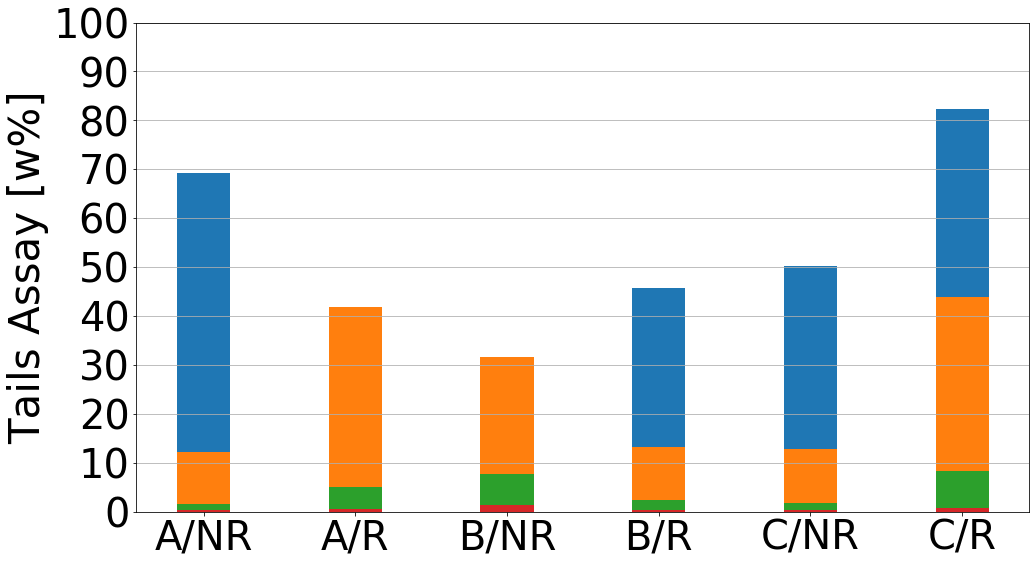

In [12]:
import matplotlib.pyplot as plt
import numpy as np
SMALL_SIZE = 40
MEDIUM_SIZE = SMALL_SIZE+2
BIGGER_SIZE = MEDIUM_SIZE +2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(16,9))

t_lvls = []

for i in range(4):
    t_lvl = []
    if i < len(t_ANR):
        t_lvl.append(t_ANR[i])
    else:
        t_lvl.append(0)
        
    if i < len(t_AR):
        t_lvl.append(t_AR[i])
    else:
        t_lvl.append(0)

    if i < len(t_BNR):
        t_lvl.append(t_BNR[i])
    else:
        t_lvl.append(0)

    if i < len(t_BR):
        t_lvl.append(t_BR[i])
    else:
        t_lvl.append(0)

    if i < len(t_CNR):
        t_lvl.append(t_CNR[i])
    else:
        t_lvl.append(0)

    if i < len(t_CR):
        t_lvl.append(t_CR[i])
    else:
        t_lvl.append(0)
    print
    t_lvls.append(tuple(t_lvl))

N = np.arange(6)
width = 0.35       # the width of the bars: can also be len(x) sequence
empty = (0,0,0,0,0,0)


t_p4 = plt.bar(N, t_lvls[3], width)
t_p3 = plt.bar(N, t_lvls[2], width )
t_p2 = plt.bar(N, t_lvls[1], width )
t_p1 = plt.bar(N, t_lvls[0], width)



plt.ylabel('Tails Assay [w%]')
#plt.title('Scores by group and gender')
plt.xticks(N, ('A/NR', 'A/R', 'B/NR', 'B/R', 'C/NR', 'C/R'))
plt.yticks(np.arange(0, 110, 10))
#plt.legend((p1[0], p2[0], p3[0], p4[0]), ('lvl 1', 'lvl 2', 'lvl 3', 'lvl 4'))
#plt.gridy()
plt.axes().yaxis.grid()
plt.savefig("tails_assays.png", dpi=150)
plt.show()